In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import chi2_contingency

# A- Question sur le cours

## 1

## 2

## 3

## 4

# B- Test d'indépendance et variables catégorielles

## 1

In [2]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP3'

In [93]:
df = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP3/stats_socio.csv')

In [13]:
df.head()

,Etudes,Parents
0,IUT/BTS,Prof_Libe
1,IUT/BTS,Employés
2,IUT/BTS,Cadres
3,Univ_Socio,Prof_Libe
4,Univ_Science,Ouvriers


In [162]:
df.shape

(2440, 2)

In [217]:
df.Etudes.value_counts()

Univ_Science        770
Ecole_Ingenieurs    520
IUT/BTS             350
Ecole_Commerce      304
Médecine            286
Univ_Socio          210
Name: Etudes, dtype: int64

In [218]:
df.Parents.value_counts()

Employés     805
Cadres       655
Ouvriers     510
Prof_Libe    470
Name: Parents, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

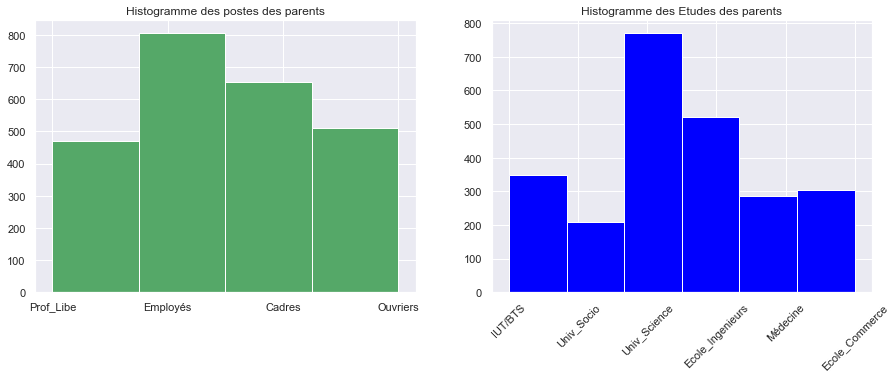

In [201]:
f, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].hist(df.Parents,bins=4,color='g')
axes[0].set_title('Histogramme des postes des parents')
axes[1].hist(df.Etudes,bins=6,color='blue')
axes[1].set_title('Histogramme des Etudes des parents')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'IUT/BTS'),
  Text(1, 0, 'Univ_Socio'),
  Text(2, 0, 'Univ_Science'),
  Text(3, 0, 'Ecole_Ingenieurs'),
  Text(4, 0, 'Médecine'),
  Text(5, 0, 'Ecole_Commerce')])

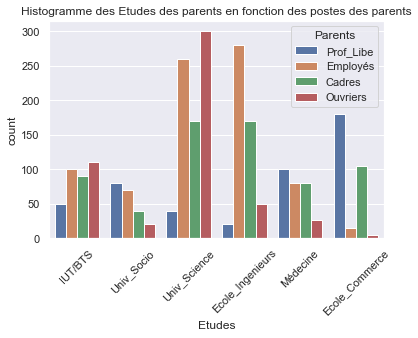

In [224]:
# Histogramme croisés des diff catégories
sns.countplot(x="Etudes",data=df,hue='Parents').set_title('Histogramme des Etudes des parents en fonction des postes des parents')
plt.xticks(rotation=45)


## 2

In [85]:
cross = pd.crosstab(df.Etudes, df.Parents)
cross

Parents,Cadres,Employés,Ouvriers,Prof_Libe
Etudes,,,,
Ecole_Commerce,105,15,4,180
Ecole_Ingenieurs,170,280,50,20
IUT/BTS,90,100,110,50
Médecine,80,80,26,100
Univ_Science,170,260,300,40
Univ_Socio,40,70,20,80


In [227]:
deg_lib = (cross.shape[0]-1)*(cross.shape[1]-1)
print(deg_lib)

15


## 3

In [157]:
chi2_contingency(cross)

(903.5797206663487,
 6.044918979046688e-183,
 15,
 array([[ 81.60655738, 100.29508197,  63.54098361,  58.55737705],
        [139.59016393, 171.55737705, 108.68852459, 100.16393443],
        [ 93.95491803, 115.47131148,  73.1557377 ,  67.41803279],
        [ 76.77459016,  94.35655738,  59.77868852,  55.09016393],
        [206.70081967, 254.03688525, 160.94262295, 148.31967213],
        [ 56.37295082,  69.28278689,  43.89344262,  40.45081967]]))

In [258]:
import math
cramer = math.sqrt(chi2_contingency(cross)[0]/(df.shape[0]*min((cross.shape[0]-1),(len(cross.columns)-1))))
print(cramer)

0.35134008104690767


## 4

# C- Étude de l'influence de l'haplogroupe I-M170 du chromosome Y sur la taille des hommes

## 1

In [150]:
lst1 = ["Azerbaïdjan","Arménie","Malte","Portugal","Albanie","Chypre","Moldavie","Roumanie","Turquie","Bulgarie","Géorgie","Grèce","Italie","Ukraine","Espagne","Russie","Macédoine","Biélorussie","Royaume Uni","France","Suisse","Irlande","Pologne","Finlande","USA (blancs)","Slovaquie","Lituanie","Belgique","Kosovo","Autriche","Slovénie","Hongrie","Norvège","Lettonie","Allemagne","Danemark","Croatie","République Tchèque","Serbie","Suède","Estonie","Islande","Monténégro","Pays-Bas"]
lst2 = [173,173,173,173.8,174,174.7, 174.8,174.9,175,175.25,175.75,176,176.4,176.5,177,177.2,177.25,177.33,177.4,177.75,178.33,178.5,178.5,178.5,178.8,179.2,179.25,179.25,179.4,179.5,179.8,179.9,180,180.25,180.25,180.33,180.4,180.9,181.2,181.3,181.4,181.8,182.9,183.75]
lst3 = [3.5,5,9,8,13.5,7.5,28,27,7,26,4,15,7.5,22.4,10,17.5,24,23.8,17,13,17.6,12.5,17.5,29,19,28,12,19.5,8,24,28,27.5,42,7,24,38.5,45,18.5,47.5,41.5,16.5,34,37.5,33]

data = pd.DataFrame(list(zip(lst2,lst3)), columns = ['Taille moyenne (cm)',"Fréquence de l'haplogroupe I-M170 (%)"], index = lst1)
data.index.name="Ville/Région"


In [152]:
data.head()

,Taille moyenne (cm),Fréquence de l'haplogroupe I-M170 (%)
Ville/Région,,
Azerbaïdjan,173.0,3.5
Arménie,173.0,5.0
Malte,173.0,9.0
Portugal,173.8,8.0
Albanie,174.0,13.5


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


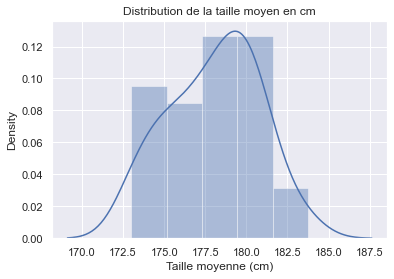

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


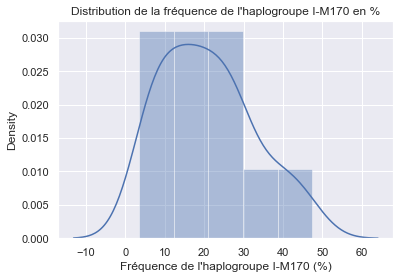

In [206]:
sns.distplot(data['Taille moyenne (cm)']).set_title("Distribution de la taille moyen en cm")
plt.show()
sns.distplot(data["Fréquence de l'haplogroupe I-M170 (%)"]).set_title("Distribution de la fréquence de l'haplogroupe I-M170 en %")
plt.show()


Text(0.5, 1.0, "Répartition de la taille moyenne en fonction de la fréquence de l'haplogroupe")

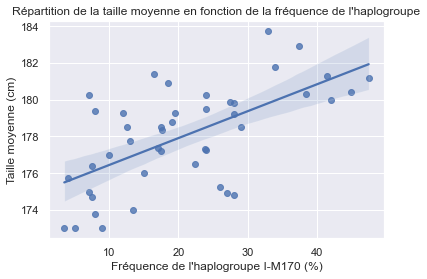

In [208]:
sns.regplot(x=data["Fréquence de l'haplogroupe I-M170 (%)"],y=data['Taille moyenne (cm)']).set_title("Répartition de la taille moyenne en fonction de la fréquence de l'haplogroupe")


## 2

In [176]:
corr = data.corr()
corr

,Taille moyenne (cm),Fréquence de l'haplogroupe I-M170 (%)
Taille moyenne (cm),1.000000,0.624254
Fréquence de l'haplogroupe I-M170 (%),0.624254,1.000000


In [199]:
sZ = math.sqrt(1/(len(data)-3))
Z = (np.log(1+corr)-np.log(1-corr))/2
Z_inf = Z - 1.96*sZ
Z_sup = Z + 1.96*sZ
inf = (np.exp(2*Z_inf)-1)/(np.exp(2*Z_inf)+1)
sup = (np.exp(2*Z_sup)-1)/(np.exp(2*Z_sup)+1)

print(inf)
print(sup)

                                       Taille moyenne (cm)  \
Taille moyenne (cm)                                    NaN   
Fréquence de l'haplogroupe I-M170 (%)             0.401843   

                                       Fréquence de l'haplogroupe I-M170 (%)  
Taille moyenne (cm)                                                 0.401843  
Fréquence de l'haplogroupe I-M170 (%)                                    NaN  
                                       Taille moyenne (cm)  \
Taille moyenne (cm)                                    NaN   
Fréquence de l'haplogroupe I-M170 (%)             0.777115   

                                       Fréquence de l'haplogroupe I-M170 (%)  
Taille moyenne (cm)                                                 0.777115  
Fréquence de l'haplogroupe I-M170 (%)                                    NaN  
